# Pre Process

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('pre_process_data2col.csv')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
data

,Unnamed: 0,clean_tweet,sentiment
0,0,ukrainian air forc would like address misinfor...,1.0
1,1,chernihiv oblast ukrainian welcom liber russia...,1.0
2,2,america prepar someth wors russianukrainianwar...,2.0
3,3,anonym hack amp releas email marathon group ru...,2.0
4,4,public mint livefor billionaire_wmnwin public ...,2.0
...,...,...,...
184883,184883,video social media allegedli eastern ukrain sh...,2.0
184884,184884,ist es klar dass die zahlungen fr ga mit ber d...,1.0
184885,184885,el decreto firmado por putin faculta gazprom c...,1.0
184886,184886,putin biden chhattisgarh riteshmishraht thealo...,1.0


In [ ]:
data.sentiment.unique()

array([ 1.,  2.,  0., nan])

In [ ]:
data.isna().sum()

Unnamed: 0     0
clean_tweet    0
sentiment      1
dtype: int64

In [ ]:
data[data['sentiment'].isna()]

,Unnamed: 0,clean_tweet,sentiment
184887,184887,v n karazin kharkiv nation univers total destr...,NaN


In [ ]:
data.drop(data[data['sentiment'].isna()].index, inplace=True)

In [ ]:
sentiment_map={0:'negative',2:'positive',1:'neutral'}
data.insert(2,'sentiment1',[sentiment_map[s] for s in data.sentiment],True)

In [ ]:
data

,Unnamed: 0,clean_tweet,sentiment1,sentiment
0,0,ukrainian air forc would like address misinfor...,neutral,1.0
1,1,chernihiv oblast ukrainian welcom liber russia...,neutral,1.0
2,2,america prepar someth wors russianukrainianwar...,positive,2.0
3,3,anonym hack amp releas email marathon group ru...,positive,2.0
4,4,public mint livefor billionaire_wmnwin public ...,positive,2.0
...,...,...,...,...
184882,184882,western spi agenc weapon intellig attempt unde...,negative,0.0
184883,184883,video social media allegedli eastern ukrain sh...,positive,2.0
184884,184884,ist es klar dass die zahlungen fr ga mit ber d...,neutral,1.0
184885,184885,el decreto firmado por putin faculta gazprom c...,neutral,1.0


In [ ]:
#labeling
reviews = np.array(data['clean_tweet'])[:]
labels = np.array(data['sentiment1'])[:]

In [ ]:
from collections import Counter

Counter(labels)

Counter({'neutral': 120869, 'positive': 42274, 'negative': 21744})

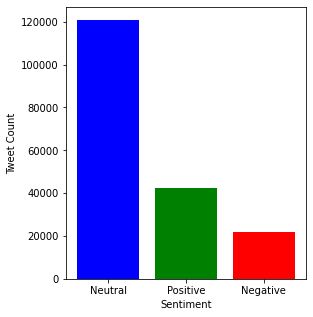

In [10]:
x = ['Neutral', 'Positive', 'Negative']
y = [120869,42274,21744]
import matplotlib.pyplot as plt
plt.figure(figsize=(4.3,5))

plt.bar(x, y, color=['blue', 'green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import csv


def preProcessor(Tweet):
    import re
    from string import punctuation
    text=re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', ' ', Tweet)
    text=re.sub(r'['+punctuation+']',' ',Tweet)
    text=re.sub(r'#(\w+)',' ',Tweet)
    text=re.sub(r'@(\w+)',' ',Tweet)
    #print(token.tokenize(text))
    return Tweet

token=RegexpTokenizer(r'\w+')
cv=CountVectorizer(lowercase=True,preprocessor=preProcessor,stop_words='english',ngram_range=(1,1),tokenizer=token.tokenize)
#text_counts=cv.fit_transform(data['Tweet'])
text_counts=cv.fit_transform(data['clean_tweet'].values.astype('U'))

In [ ]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(text_counts,data['sentiment1'],test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(text_counts,data['sentiment1'],test_size=0.2)

#Naive Bayes

In [ ]:
#Ber_NB
from sklearn.naive_bayes import *
from sklearn import metrics

clf=BernoulliNB()
clf.fit(x_train,y_train)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print('Acurracy = ' ,metrics.accuracy_score(y_test, pred))

Acurracy =  0.8714911569041052


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.74      0.80      0.77      4302
     neutral       0.97      0.87      0.92     24255
    positive       0.73      0.92      0.81      8421

    accuracy                           0.87     36978
   macro avg       0.81      0.86      0.83     36978
weighted avg       0.89      0.87      0.88     36978



#SVM

In [ ]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print('Acurracy = ' ,metrics.accuracy_score(y_test, pred))

Acurracy =  0.9860187138298447


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
print('Acurracy = ' ,metrics.accuracy_score(y_test, pred))

Acurracy =  0.9860187138298447


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.98      0.96      0.97      4298
     neutral       0.99      0.99      0.99     24345
    positive       0.98      0.97      0.98      8335

    accuracy                           0.99     36978
   macro avg       0.98      0.98      0.98     36978
weighted avg       0.99      0.99      0.99     36978



In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Confusion matrix, without normalization
[[ 4141    95    62]
 [   54 24209    82]
 [   50   168  8117]]
Normalized confusion matrix
[[0.96 0.02 0.01]
 [0.   0.99 0.  ]
 [0.01 0.02 0.97]]


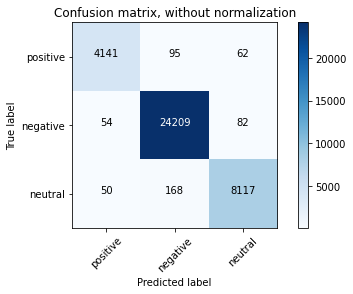

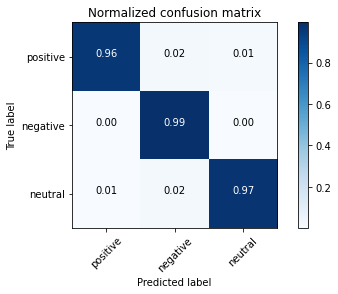

Confusion matrix, without normalization
[[ 4141    95    62]
 [   54 24209    82]
 [   50   168  8117]]
Normalized confusion matrix
[[0.96 0.02 0.01]
 [0.   0.99 0.  ]
 [0.01 0.02 0.97]]


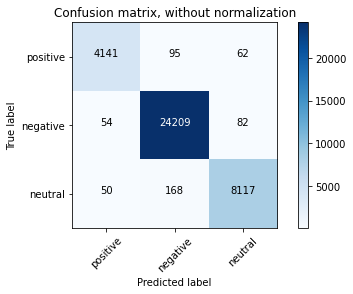

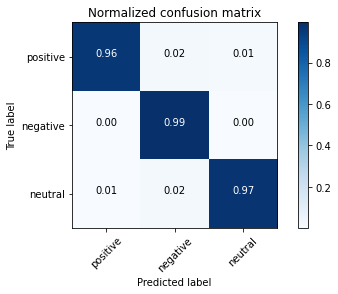

In [ ]:
#linear
from sklearn.svm import LinearSVC
import sklearn
from sklearn.naive_bayes import *
from sklearn import metrics
from sklearn.metrics import confusion_matrix
clf=LinearSVC()
clf.fit(x_train,y_train)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
metrics.accuracy_score(y_test, pred)
metrics.accuracy_score(y_test, pred)
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

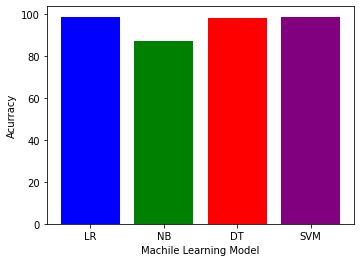

In [19]:
x = ['LR', 'NB', 'DT', 'SVM']
y = [98.3,87.1,98.2,98.6]

plt.figure(figsize=(5.5,4))

plt.bar(x, y, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Machile Learning Model')
plt.ylabel('Acurracy')
plt.show()

#Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(text_counts,data['sentiment1'],test_size=0.2)

print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(147909, 106889)
(147909,)
(36978, 106889)
(36978,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(max_iter = 1000, random_state = 0)
model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)
print(cm)

[[ 4161   169    80]
 [   37 24051    40]
 [   76   194  8170]]


In [ ]:
print('Acurracy = ' ,metrics.accuracy_score(y1_test, y1_pred))

Acurracy =  0.9838823083995889


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

    negative       0.97      0.94      0.96      4410
     neutral       0.99      1.00      0.99     24128
    positive       0.99      0.97      0.98      8440

    accuracy                           0.98     36978
   macro avg       0.98      0.97      0.98     36978
weighted avg       0.98      0.98      0.98     36978



#Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model = MultinomialNB()
model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)

print(cm)

[[1927   79  191]
 [ 997 9545 1502]
 [ 219  138 3891]]


In [ ]:
metrics.accuracy_score(y1_test, y1_pred)

0.8309264968359565

In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

    negative       0.62      0.86      0.72      4400
     neutral       0.98      0.80      0.88     24246
    positive       0.69      0.92      0.79      8332

    accuracy                           0.83     36978
   macro avg       0.76      0.86      0.80     36978
weighted avg       0.87      0.83      0.84     36978



#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cm = confusion_matrix(y1_test, y1_pred)

print(cm)

[[ 4146   139   125]
 [   60 23997    71]
 [  100   156  8184]]


In [ ]:
print('Acurracy = ' ,metrics.accuracy_score(y1_test, y1_pred))

Acurracy =  0.9823949375304235


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

    negative       0.96      0.94      0.95      4410
     neutral       0.99      0.99      0.99     24128
    positive       0.98      0.97      0.97      8440

    accuracy                           0.98     36978
   macro avg       0.98      0.97      0.97     36978
weighted avg       0.98      0.98      0.98     36978



In [ ]:
data.to_csv("pre_process_data4col.csv", encoding='utf-8-sig')